In [2]:
import pandas as pd 
import os

import matplotlib.pyplot as plt 
from skimage import io
import matplotlib.patches as patches

In [4]:
bbox = pd.read_csv("list_bbox_celeba.txt", skiprows=1, delim_whitespace=True)
bbox.insert(1,"label", 0)
train = bbox.iloc[20000:]
val = bbox.iloc[:20000]

216 19 122 169


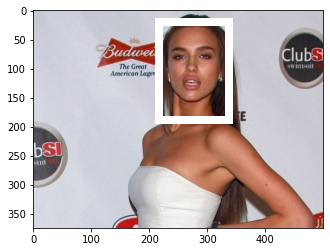

In [14]:
id = 5631
img = io.imread('images/train/'+train['image_id'].values[id])
h_a = img.shape[0]
w_a = img.shape[1]

fig, ax = plt.subplots()
ax.imshow(img)
x, y, w, h = train[['x_1', 'y_1', 'width', 'height']].values[id]
print(x,y,w,h)
rect = patches.Rectangle((x,y), w, h, linewidth=8,edgecolor='w',facecolor='none')
ax.add_patch(rect)

# # Checking saved labels 
# landmarks = pd.read_csv("labels/train/"+train['image_id'].values[id][:-3]+'txt', delim_whitespace=True, names=['_','x','y','w','h'])
# x, y, w, h = landmarks[['x','y','w','h']].values[0]
# x=x-w/2
# y=y-h/2
# print(x,y,w,h)
# x, y, w, h = x*w_a, y*h_a, w*w_a, h*h_a
# print(x,y,w,h)
# rect = patches.Rectangle((x,y), w, h, linewidth=4, edgecolor='r',facecolor='none')
# ax.add_patch(rect)

plt.show()

# Scaling coordinates between 0-1

In [ ]:
# !pip install opsdroid-get-image-size

In [15]:
import get_image_size
def getwh(filename, img_folder):
    width, height = get_image_size.get_image_size(img_folder+filename)
    return width, height

In [18]:
# Getting width and height of all the images and adding these to dataframe with bboxes to store them
for df, img_folder in zip([train, val], ['images/train/', 'images/val/']):
    hw_lists = df.iloc.image_id.apply(lambda x: getwh(x, img_folder))
    df[['wm','hm']] = pd.DataFrame.from_dict(dict(zip(hw_lists.index, hw_lists.values))).T.values
    df.to_csv(f"{img_folder.split(sep='/')[1]}_bbox_wSizes.csv", index=False)

train = pd.read_csv("train_bbox_wSizes.csv")
val = pd.read_csv("val_bbox_wSizes.csv")

In [102]:
for df in [train, val]:
    # Convert corner coordinates to centers
    df['x_1'] = df['x_1'] + df['width']/2
    df['y_1'] = df['y_1'] + df['height']/2
    # Scale values in range [0,1]
    df['x_1'] = (df['x_1'] / df['wm']).round(6)
    df['width'] = (df['width'] / df['wm']).round(6)
    df['y_1'] = (df['y_1'] / df['hm']).round(6)
    df['height'] = (df['height'] / df['hm']).round(6)

# Saving labels in folders

In [104]:
# train = train[['image_id', 'label' 'x_1', 'y_1', 'width', 'height']]
# val = val[['image_id', 'label' 'x_1', 'y_1', 'width', 'height']]
for df, img_folder in zip([train, val], ['labels/train/', 'labels/val/']):
    for row in df[['image_id', 'label', 'x_1', 'y_1', 'width', 'height']].values:
        filename = row[0]
        values = row[1:]
        with open(f"{img_folder}{filename.split('.')[0]}.txt", "w") as file:
            file.write(str(values)[1:-1])

> Images were manually moved to folders

# Training YoloV5 

Model was trained with cmd interface with the comand below

In [ ]:
# python yolov5/train.py --data celebA_face_detection.yaml --cfg yolov5n.yaml --batch-size 64 --device 0 --workers 4  --epochs 5 --img 300

~ 3 hours - 1 epoch